<a href="https://colab.research.google.com/github/valeraboyko2002/test/blob/main/%D0%BB%D0%B8%D0%BD_%D0%B0%D0%BB%D0%B3%D0%B5%D0%B1%D1%80%D0%B0_%D0%BF%D1%80%D0%BE%D0%B4%D0%BE%D0%BB%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная алгебра, 2 часть: Операции с матрицами

## 1: Разложение матрицы по собственным значениям

процесс в линейной алгебре, при котором квадратная матрица раскладывается на набор собственных векторов и собственных значений

### Аффинное преобразование

Это любое преобразование, при котором сохраняется коллинеарность, параллельность, а также отношение расстояний между точками (например, середина линии остаётся серединой после преобразования). При этом не обязательно сохраняются расстояния и углы

Допустим у нас есть вектор $v$:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
v = np.array([3,1])
v

array([3, 1])

Изобразим вектор $v$ используя функцию `plot_vectors()`

In [62]:
def plot_vectors(vectors, colors):
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

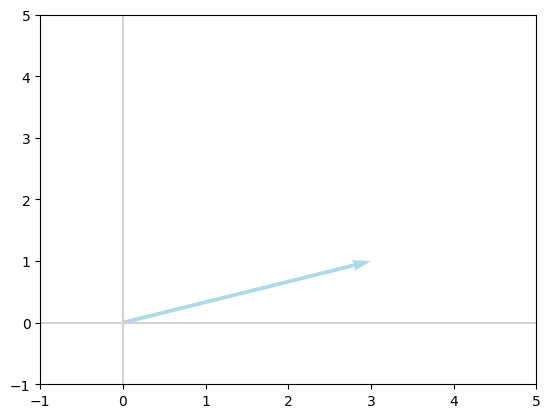

In [4]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In [5]:
plot_vectors_v2([v],['lightblue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

NameError: name 'plot_vectors_v2' is not defined

Применение матрицы к вектору (матрично-векторное умножение) позволяет линейно преобразовать вектор

применение единичной матрицы на вектор не преобразует его

In [6]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [7]:
Iv = I @ v
Iv

array([3, 1])

In [8]:
v == Iv

array([ True,  True])

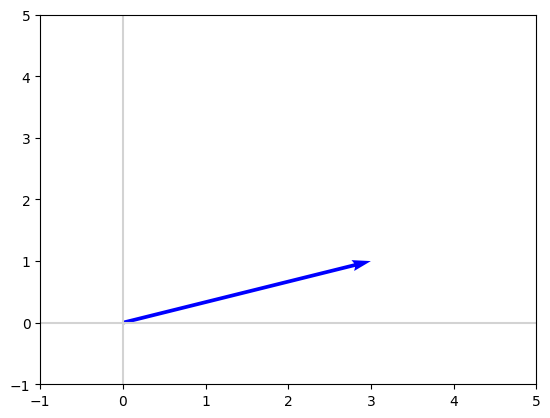

In [9]:
plot_vectors([Iv],['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

Представим матрицу (назовем ее $E$) которая разворачивает вектор на $x$-оси:

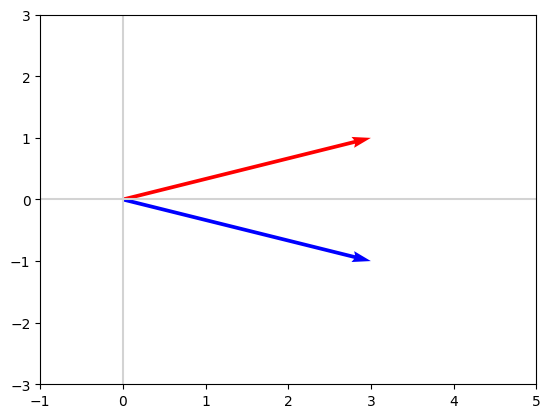

In [10]:
E = np.array([[1,0],[0,-1]])
Ev = E @ v
plot_vectors([v,Ev],['red','blue'])
plt.xlim(-1,5)
_ = plt.ylim(-3,3)

или, эту матрицу, $F$, которая разворачивает на $y$-оси:

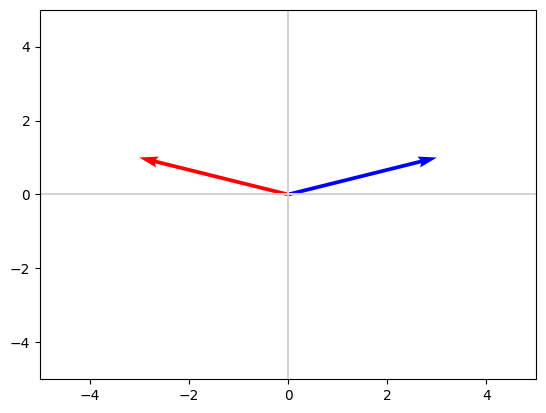

In [11]:
F = np.array([[-1,0],[0,1]])
Fv = F @ v
plot_vectors([v,Fv],['blue','red'])
plt.xlim(-5,5)
_ = plt.ylim(-5,5)

Применение отображающей матрицы является примером **аффинного преобразования**: изменения вектора, которое может изменить расстояния или углы между векторами, но сохраняет параллельность между ними

Помимо отражения матрицы относительно оси (рефлексия), другие распространенные аффинные преобразования включают:

Масштабирование (изменение длины векторов)

Сдвиг

Поворот


Матрица может применять несколько аффинных преобразований одновременно (например, отражение относительно оси и поворот на 45 градусов).

В качестве примера применим эту матрицу $A$ к вектору $v$:



In [12]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [13]:
Av = A @ v
Av

array([1, 4])

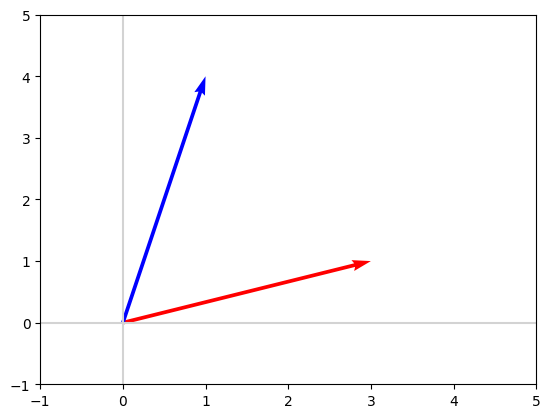

In [14]:
plot_vectors([v,Av],['red','blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

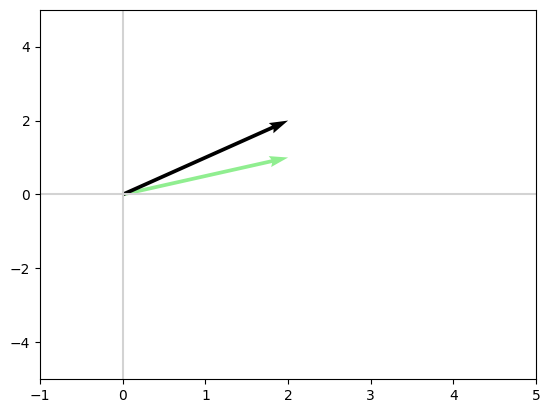

In [15]:
v2 = np.array([2,1])
plot_vectors([v2,A@v2],['lightgreen','black'])
plt.xlim(-1,5)
_ = plt.ylim(-5,5)

Можно объединить несколько векторов в одну матрицу (например, $V$), где каждый столбец представляет собой отдельный вектор. Затем любые линейные преобразования, которые применяются к $V$, будут независимо применены к каждому столбцу (вектору):



In [16]:
v

array([3, 1])

In [17]:
np.matrix(v).T

matrix([[3],
        [1]])

In [18]:
v3 = np.array([-3,-1])
v4 = np.array([-1,1])

V = np.concatenate((np.matrix(v).T,np.matrix(v2).T,
                    np.matrix(v3).T,np.matrix(v4).T),axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [19]:
IV = I @ V
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [20]:
AV = A @ V
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [21]:
V3 = V * 3
V3

matrix([[ 9,  6, -9, -3],
        [ 3,  3, -3,  3]])

In [29]:
# функция преобразующая колонки матрицы в 1D вектор:
def vectorfy(mtrx,clmn):
  return np.array(mtrx[:,clmn].reshape(-1))

In [23]:
vectorfy(V,0)

array([[3, 1]])

In [24]:
vectorfy(V,0) == v

array([[ True,  True]])

In [25]:
vectorfy(V,1) == v2

array([[ True,  True]])

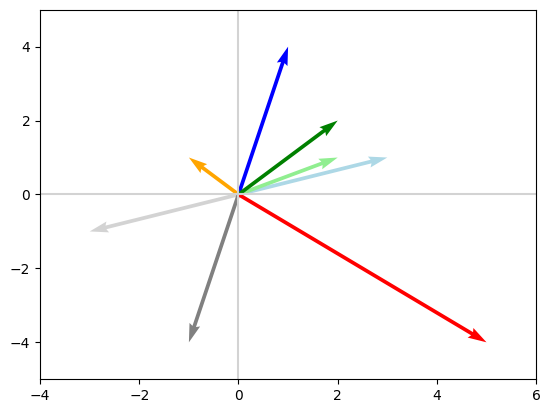

In [26]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)],
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

**Собственный вектор** — это особый вектор v, который при преобразовании с помощью некоторой матрицы (скажем, A) сохраняет своё направление. Другими словами, результат умножения Av имеет точно такое же направление, как и сам вектор v.

**Собственное значение** — это скаляр (традиционно обозначаемый как λ), который просто масштабирует собственный вектор v, так что выполняется следующее уравнение:

Av = λv

In [30]:
A

array([[-1,  4],
       [ 2, -2]])

Матрица содержит столько собственных векторов, сколько имеется столбцов в матрице А:

In [31]:
V # каждый столбец это отдельный собственный вектор

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

Собственные векторы и собственные значения могут быть вычислены алгебраическим методом ([QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), который был независимо разработан в 1950-х годах [Верой Кублановской](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) и Джоном Фрэнсисом), однако я воспользуюсь "укороченным путём" с помощью метода NumPy eig(), который возвращает кортеж из:

* вектора собственных значений
* матрицы собственных векторов



In [64]:
A

array([[-1,  4],
       [ 2, -2]])

In [50]:
n = np.array([[1,0,1],[1,2,0],[8,0,-1]])
n

array([[ 1,  0,  1],
       [ 1,  2,  0],
       [ 8,  0, -1]])

In [54]:
lambdas, V = np.linalg.eig(A)
V

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [55]:
lambdas

array([ 1.37228132, -4.37228132])

Проверим $Av = \lambda v$ для первого собственного вектора

In [53]:
v = V[:,0]
v

array([0., 1., 0.])

In [38]:
lambduh = lambdas[0]
lambduh

np.float64(1.3722813232690143)

In [39]:
Av = A @ v
Av

array([1.18031462, 0.70000958])

In [40]:
lambduh * v

array([1.18031462, 0.70000958])

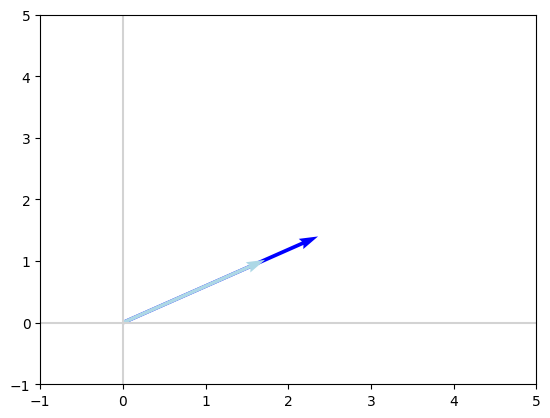

In [49]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In [56]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [57]:
lambda2 = lambdas[1]
lambda2

np.float64(-4.372281323269014)

In [59]:
Av2  = A @ v2
Av2

array([ 3.34281692, -2.81822977])

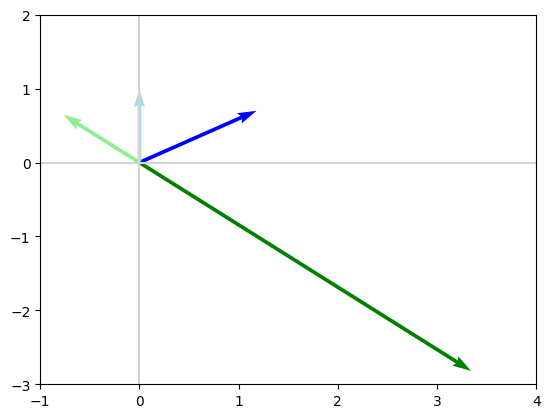

In [63]:
plot_vectors([Av,v,Av2,v2],['blue','lightblue','green','lightgreen'])
plt.xlim(-1,4)
_ = plt.ylim(-3,2)